# Visual exploratory data analysis

## Does time of day affect arrest rate?

### Calculating the hourly arrest rate


In [6]:
import pandas as pd
ri = pd.read_csv("police.csv")
ri.drop(["county_name", "state"], axis="columns", inplace=True)
ri.dropna(subset=["driver_gender"], inplace=True)
ri["is_arrested"] = ri.is_arrested.astype("bool")
combined = ri.stop_date.str.cat(ri.stop_time, sep=" ")
ri["stop_datetime"] = pd.to_datetime(combined)
ri.set_index("stop_datetime", inplace=True)
print(ri["is_arrested"].mean())
print(ri.groupby(ri.index.hour).is_arrested.mean())
hourly_arrest_rate =ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


### Plotting the hourly arrest rate

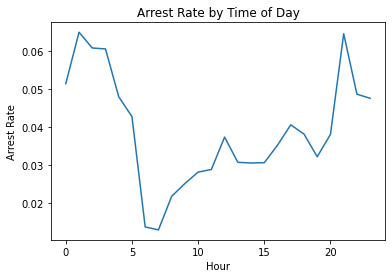

In [8]:
import matplotlib.pyplot as plt
hourly_arrest_rate.plot()
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.show()

## Are drug-related stops on the rise?

### Plotting drug-related stops

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


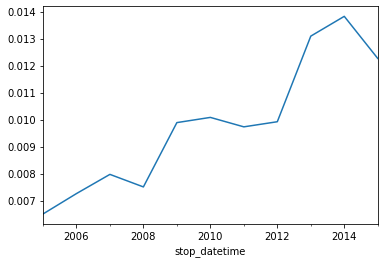

In [15]:
print(ri.drugs_related_stop.resample("A").mean())
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()
annual_drug_rate.plot()
plt.show()

The rate of drug-related stops nearly doubled over the course of 10 years.

### Comparing drug and search rates


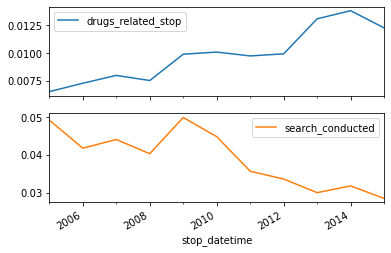

In [24]:
annual_search_rate = ri.search_conducted.resample("A").mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis="columns")
annual.plot(subplots=True)
plt.show()

The rate of drug-related stops increased even though the search rate decreased.

## What violations are caught in each district?

### Tallying violations by district

In [31]:
print(pd.crosstab(ri.district, ri.violation))
all_zones = pd.crosstab(ri.district, ri.violation)
print(all_zones.loc["Zone K1": "Zone K3"])
k_zones = all_zones.loc["Zone K1": "Zone K3"]

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

### Plotting violations by district

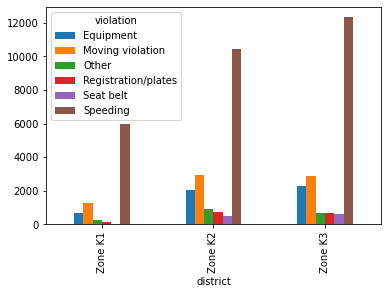

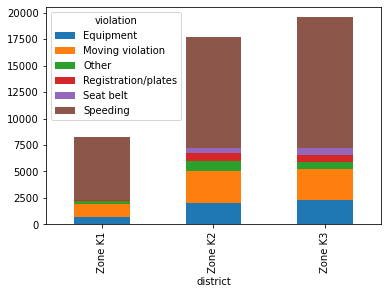

In [33]:
k_zones.plot(kind="bar")
plt.show()
k_zones.plot(kind="bar", stacked=True)
plt.show()

## How long might you be stopped for a violation?

### Converting stop durations to numbers

In [45]:
print(ri.stop_duration.unique())
mapping = {"0-15 Min":8, "16-30 Min":23, "30+ Min":45}
ri["stop_minutes"] = ri.stop_duration.map(mapping)
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


### Plotting stop length

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


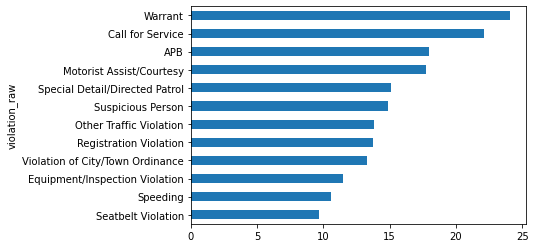

In [50]:
print(ri.groupby("violation_raw").stop_minutes.mean())
stop_length = ri.groupby("violation_raw").stop_minutes.mean()
stop_length.sort_values().plot(kind="barh")
plt.show()